# **Customer Churn Prediction and Driver Analysis for Telco Services**

# Aim
To perform a comprehensive churn prediction analysis using the `Telco_Cusomer_Churn.csv` dataset, including data loading, initial inspection, exploratory data analysis, data preprocessing and cleaning, feature engineering, model training and selection using various classification algorithms, model evaluation, and interpretation of results to identify key churn drivers.

## Load Data




In [1]:
import pandas as pd
df = pd.read_csv('/content/Telco_Cusomer_Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Initial Data Inspection




In [2]:
print("Data types:")
print(df.dtypes)
print("\nMissing values:")
print(df.isnull().sum())
print("\nDataFrame Info:")
df.info()

Data types:
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Missing values:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling 

## Exploratory Data Analysis (EDA)



In [3]:
import numpy as np

# Convert 'TotalCharges' to numeric, replacing empty strings with NaN
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan).astype(float)

# Handle missing values by imputing with the median
median_total_charges = df['TotalCharges'].median()
df['TotalCharges'].fillna(median_total_charges, inplace=True)

print(f"'TotalCharges' column successfully converted to float and missing values imputed with median: {median_total_charges:.2f}")
print("Verifying 'TotalCharges' data type and missing values:")
print(df['TotalCharges'].dtype)
print(df['TotalCharges'].isnull().sum())

'TotalCharges' column successfully converted to float and missing values imputed with median: 1397.47
Verifying 'TotalCharges' data type and missing values:
float64
0


/tmp/ipython-input-2918552511.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(median_total_charges, inplace=True)


In [4]:
import numpy as np

# Convert 'TotalCharges' to numeric, replacing empty strings with NaN
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan).astype(float)

# Handle missing values by imputing with the median
median_total_charges = df['TotalCharges'].median()
df['TotalCharges'] = df['TotalCharges'].fillna(median_total_charges)

print(f"'TotalCharges' column successfully converted to float and missing values imputed with median: {median_total_charges:.2f}")
print("Verifying 'TotalCharges' data type and missing values:")
print(df['TotalCharges'].dtype)
print(df['TotalCharges'].isnull().sum())

'TotalCharges' column successfully converted to float and missing values imputed with median: 1397.47
Verifying 'TotalCharges' data type and missing values:
float64
0



To visualize the distributions of numerical features, I will create histograms for 'tenure', 'MonthlyCharges', and 'TotalCharges' as per the subtask instructions. This will help in understanding their patterns and identifying any skewness or outliers.



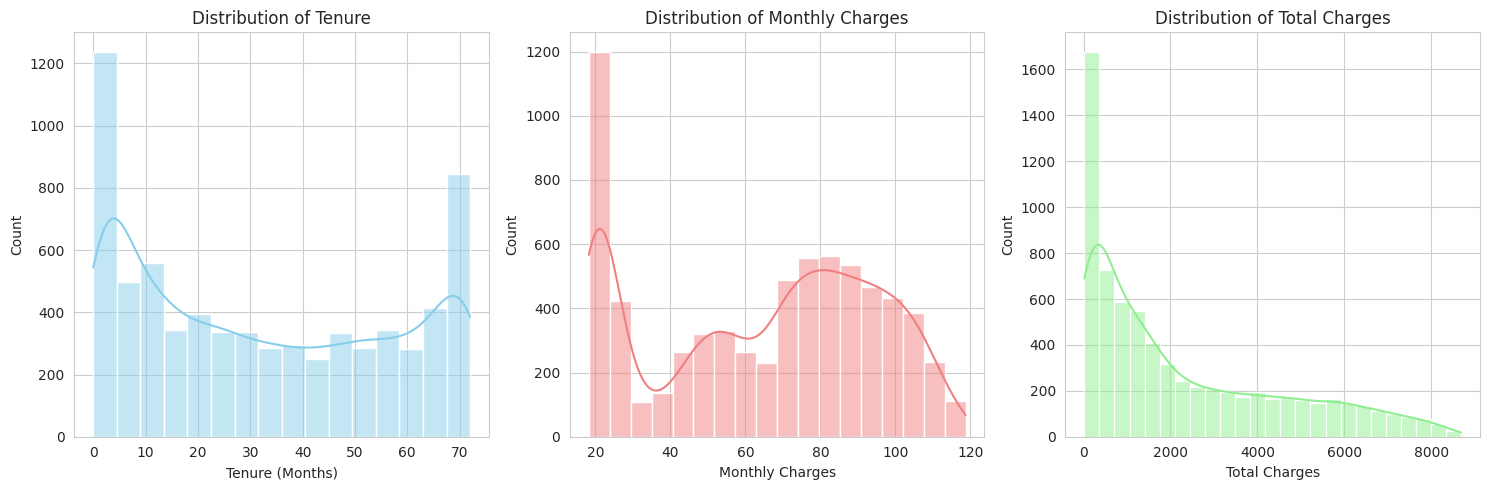

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a figure to hold the histograms
plt.figure(figsize=(15, 5))

# Histogram for 'tenure'
plt.subplot(1, 3, 1) # 1 row, 3 columns, 1st plot
sns.histplot(df['tenure'], kde=True, color='skyblue')
plt.title('Distribution of Tenure')
plt.xlabel('Tenure (Months)')
plt.ylabel('Count')

# Histogram for 'MonthlyCharges'
plt.subplot(1, 3, 2) # 1 row, 3 columns, 2nd plot
sns.histplot(df['MonthlyCharges'], kde=True, color='lightcoral')
plt.title('Distribution of Monthly Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Count')

# Histogram for 'TotalCharges'
plt.subplot(1, 3, 3) # 1 row, 3 columns, 3rd plot
sns.histplot(df['TotalCharges'], kde=True, color='lightgreen')
plt.title('Distribution of Total Charges')
plt.xlabel('Total Charges')
plt.ylabel('Count')

plt.tight_layout()
plt.show()



To visualize the distribution of categorical features, I will identify all object-type columns (excluding 'customerID' and 'Churn' as they are not relevant for this step of categorical distribution) and create count plots for each of them. This will help in understanding the frequency of each category within these features.



In [26]:
import warnings
warnings.filterwarnings("ignore")

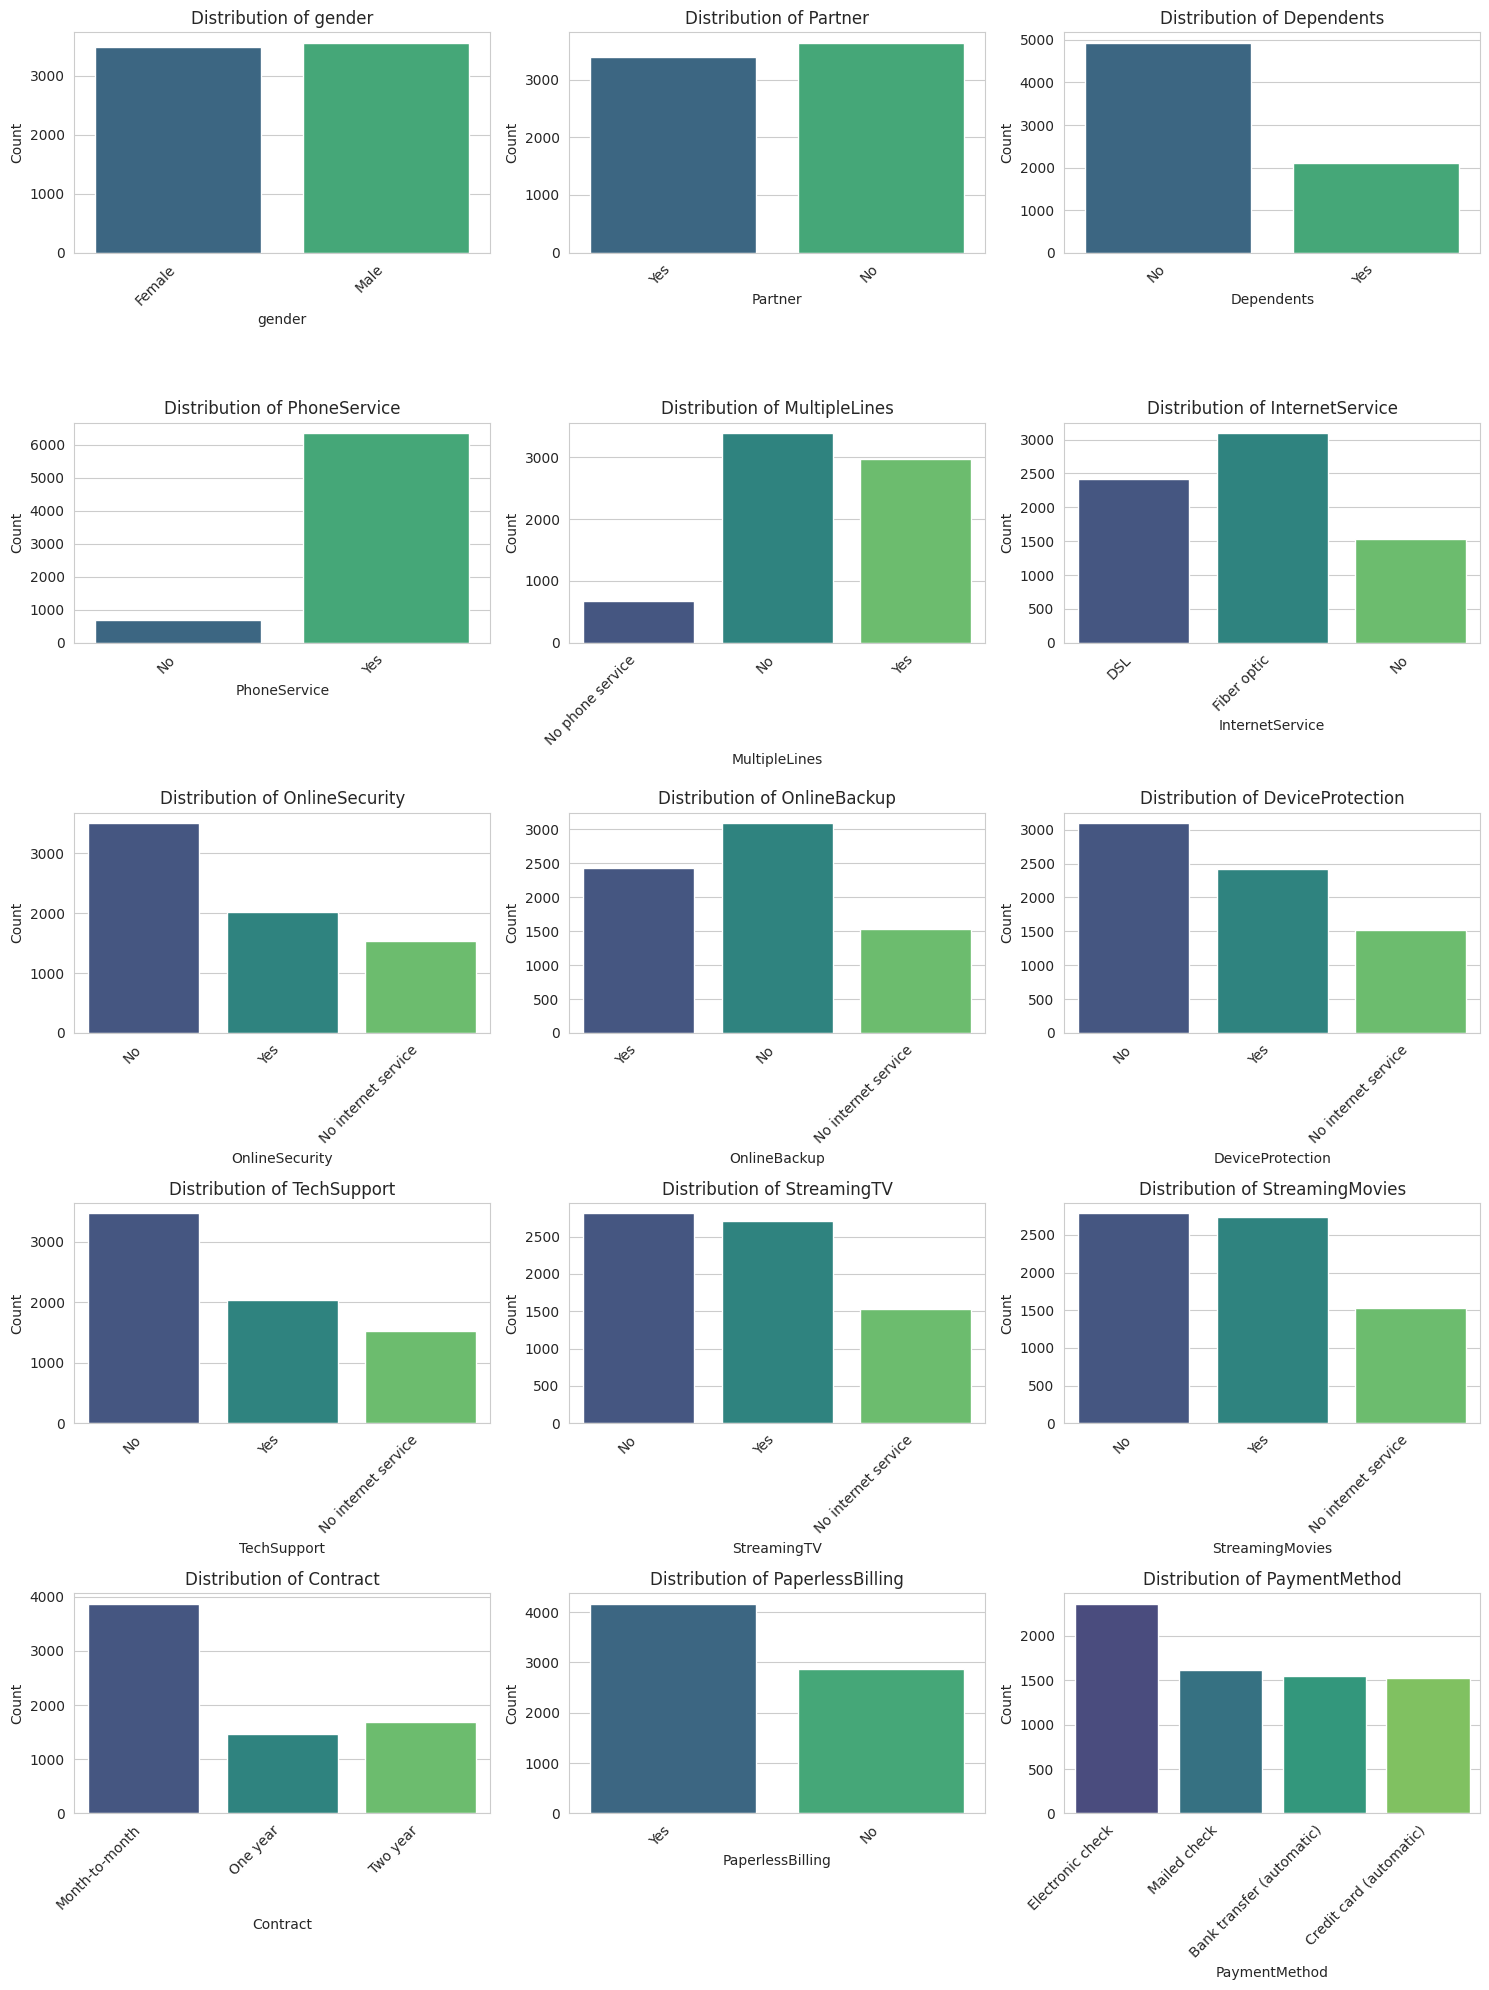

In [7]:
categorical_cols = df.select_dtypes(include='object').columns.tolist()
categorical_cols.remove('customerID')
categorical_cols.remove('Churn')

# Determine the number of rows and columns for the subplots
n_cols = 3
n_rows = (len(categorical_cols) + n_cols - 1) // n_cols # Calculate number of rows needed

plt.figure(figsize=(n_cols * 5, n_rows * 4))

for i, col in enumerate(categorical_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.countplot(data=df, x=col, hue=col, palette='viridis', legend=False) # Fixed line
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()



To visualize the relationship between categorical features and the 'Churn' target variable, I will create count plots for each categorical column, using 'Churn' as the hue. This will display the distribution of 'Churn' for each category within the feature, allowing for an understanding of how each category influences churn.



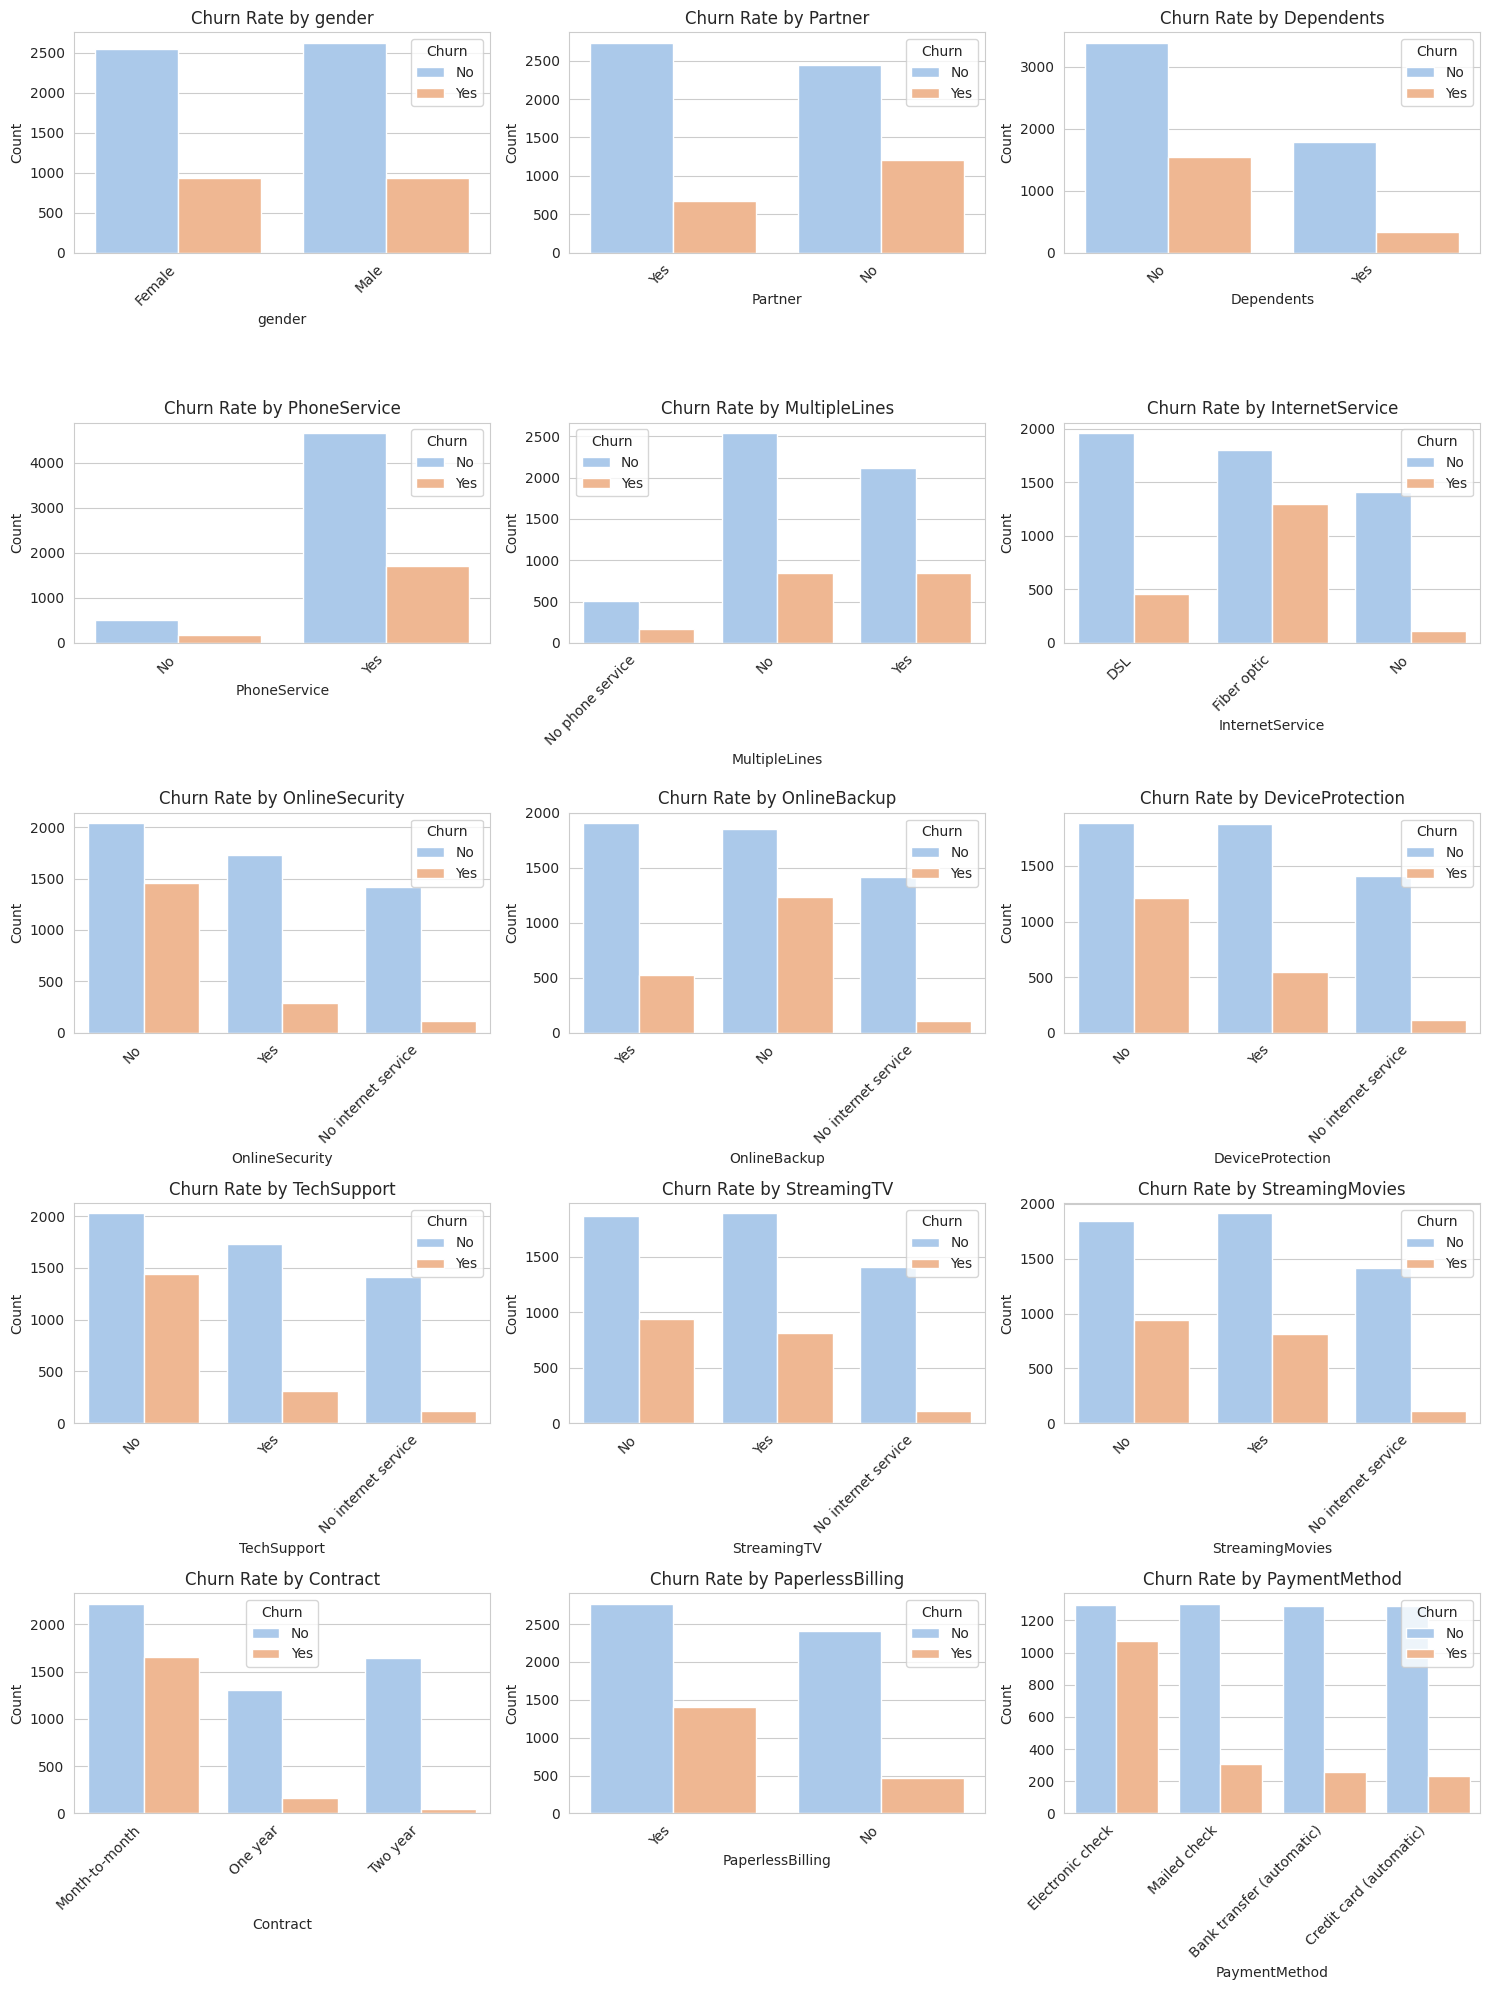

In [8]:
n_cols = 3
n_rows = (len(categorical_cols) + n_cols - 1) // n_cols

plt.figure(figsize=(n_cols * 5, n_rows * 4))

for i, col in enumerate(categorical_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.countplot(data=df, x=col, hue='Churn', palette='pastel')
    plt.title(f'Churn Rate by {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Churn')

plt.tight_layout()
plt.show()


To visualize the relationship between numerical features and the 'Churn' target variable, I will create box plots for 'tenure', 'MonthlyCharges', and 'TotalCharges' against 'Churn'. This will help in understanding how the distribution of these numerical features differs between churning and non-churning customers.



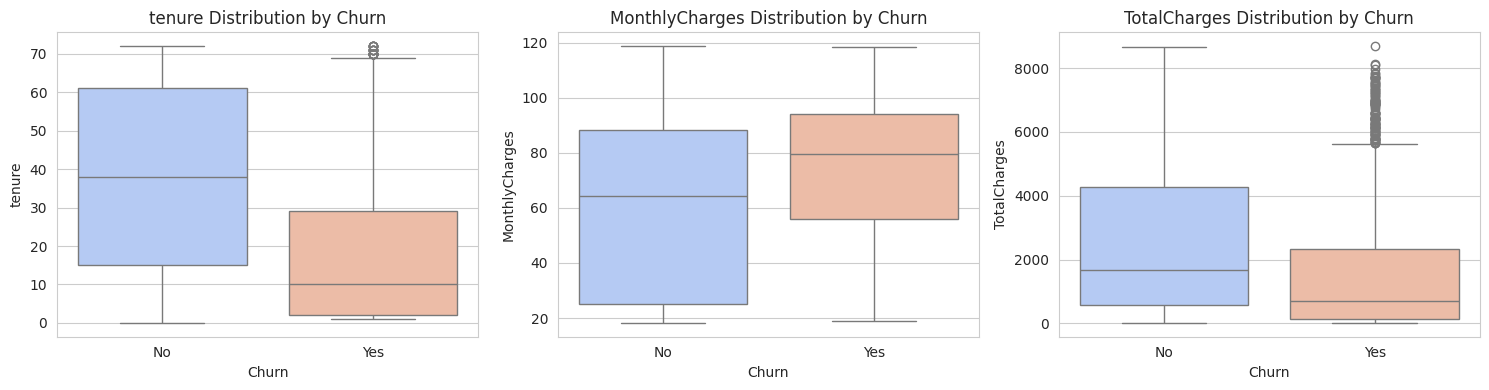

In [28]:
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
n_cols = 3
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols

plt.figure(figsize=(n_cols * 5, n_rows * 4))

for i, col in enumerate(numerical_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(data=df, x='Churn', y=col, palette='coolwarm')
    plt.title(f'{col} Distribution by Churn')
    plt.xlabel('Churn')
    plt.ylabel(col)

plt.tight_layout()
plt.show()


To complete the EDA, I will calculate the correlation matrix for the numerical features ('tenure', 'MonthlyCharges', 'TotalCharges') and visualize it using a heatmap. This will help identify the linear relationships between these features.



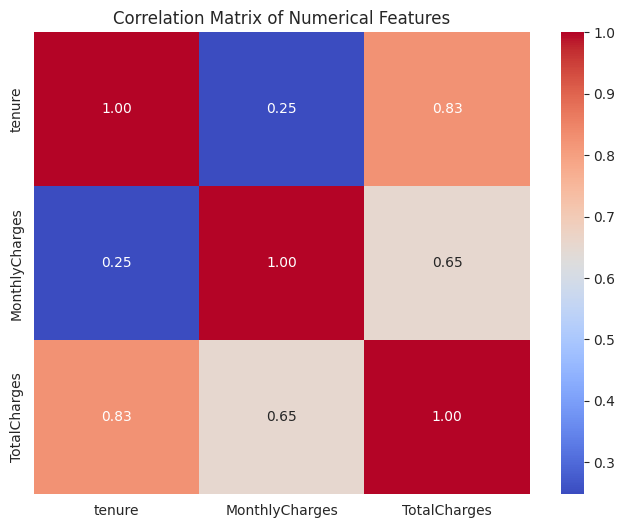

In [29]:
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()


## Data Preprocessing and Cleaning





The first step in data preprocessing is to remove irrelevant identifier columns like 'customerID' and convert the target variable 'Churn' into a numerical format, mapping 'Yes' to 1 and 'No' to 0 for machine learning compatibility.



In [30]:
df_processed = df.copy()
df_processed = df_processed.drop('customerID', axis=1)

# Convert 'Churn' to numerical (Yes=1, No=0)
df_processed['Churn'] = df_processed['Churn'].map({'Yes': 1, 'No': 0})

print("Dropped 'customerID' column and converted 'Churn' to numerical:")
print(df_processed[['customerID', 'Churn']].head() if 'customerID' in df_processed.columns else df_processed['Churn'].head())
print(f"'Churn' column data type: {df_processed['Churn'].dtype}")

Dropped 'customerID' column and converted 'Churn' to numerical:
0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64
'Churn' column data type: int64


## Feature Engineering





To create the `TotalAddonServices` feature, I will identify the one-hot encoded columns corresponding to individual add-on services (those ending with '_Yes'), sum their values for each row, and then scale this new feature using a new `StandardScaler` to ensure its values are normalized independently, avoiding interference with previously scaled features.



In [15]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Identify the columns representing individual add-on services
addon_service_cols = [
    'MultipleLines_Yes',
    'OnlineSecurity_Yes',
    'OnlineBackup_Yes',
    'DeviceProtection_Yes',
    'TechSupport_Yes',
    'StreamingTV_Yes',
    'StreamingMovies_Yes'
]

# Ensure these columns exist in the DataFrame before summing
existing_addon_cols = [col for col in addon_service_cols if col in df_processed.columns]

if existing_addon_cols:
    # Create a new numerical feature 'TotalAddonServices' by summing these columns
    # Convert boolean columns to int for summation if they are not already
    df_processed['TotalAddonServices'] = df_processed[existing_addon_cols].astype(int).sum(axis=1)
    print("Created 'TotalAddonServices' feature.")

    # Scale the newly created numerical feature `TotalAddonServices`
    # Instantiate a new StandardScaler for this specific feature to avoid re-fitting the previous scaler
    scaler_addon = StandardScaler()
    df_processed['TotalAddonServices'] = scaler_addon.fit_transform(df_processed[['TotalAddonServices']])
    print("Scaled 'TotalAddonServices' feature.")
else:
    print("Warning: None of the specified add-on service columns were found in the DataFrame.")

print("\nFirst few rows of df_processed with 'TotalAddonServices':")
print(df_processed[['TotalAddonServices']].head())
print(f"'TotalAddonServices' column data type: {df_processed['TotalAddonServices'].dtype}")

Created 'TotalAddonServices' feature.
Scaled 'TotalAddonServices' feature.

First few rows of df_processed with 'TotalAddonServices':
   TotalAddonServices
0           -0.713676
1           -0.224772
2           -0.224772
3            0.264131
4           -1.202579
'TotalAddonServices' column data type: float64


In [36]:
import pandas as pd

# Identify categorical columns to encode
categorical_cols_to_process = df_processed.select_dtypes(include='object').columns.tolist()

binary_cols = []
one_hot_cols = []

for col in categorical_cols_to_process:
    if df_processed[col].nunique() == 2:
        binary_cols.append(col)
    else:
        one_hot_cols.append(col)

# Apply binary encoding
for col in binary_cols:
    # Ensure consistent mapping for common binary features
    if col == 'gender':
        mapping = {'Female': 0, 'Male': 1}
    elif df_processed[col].isin(['No', 'Yes', 'No phone service', 'No internet service']).all():
        # Generic mapping for 'Yes'/'No' like columns, map 'No' to 0 and 'Yes' to 1
        mapping = {'No': 0, 'Yes': 1, 'No phone service': 0, 'No internet service': 0}
    else: # Fallback for other two-unique value columns
        unique_vals = df_processed[col].unique()
        mapping = {unique_vals[0]: 0, unique_vals[1]: 1}

    df_processed[col] = df_processed[col].map(mapping).astype(int) # Explicitly cast to int
    print(f"Binary encoded column '{col}' to numerical values.")

# Apply one-hot encoding
if one_hot_cols:
    df_processed = pd.get_dummies(df_processed, columns=one_hot_cols, drop_first=True)
    print(f"One-hot encoded columns: {one_hot_cols}.")

# Ensure all boolean columns (from get_dummies) are converted to int
for col in df_processed.select_dtypes(include='bool').columns:
    df_processed[col] = df_processed[col].astype(int)
    print(f"Converted boolean column '{col}' to int.")

print("\nDataFrame after all categorical encoding and type conversion:")
print(df_processed.head())
print(df_processed.dtypes.value_counts()) # Show counts of each dtype to verify



DataFrame after all categorical encoding and type conversion:
   gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   PaperlessBilling  MonthlyCharges  TotalCharges  Churn  ...  \
0                 1           29.85         29.85      0  ...   
1                 0           56.95       1889.50      0  ...   
2                 1           53.85        108.15      1  ...   
3                 0           42.30       1840.75      0  ...   
4                 1           70.70        151.65      1  ...   

   TechSupport_Yes  StreamingTV_No internet service  StreamingTV_Yes  \
0                0                             

## Model Training and Selection





To prepare the data for model training, I will first separate the features (X) from the target variable (y), which is 'Churn'. Then, I will split the dataset into training and testing sets using `train_test_split` with a `test_size` of 0.2 and a `random_state` for reproducibility, as instructed.



In [37]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = df_processed.drop('Churn', axis=1)
y = df_processed['Churn']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data split into training and testing sets:")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Data split into training and testing sets:
X_train shape: (5634, 30)
X_test shape: (1409, 30)
y_train shape: (5634,)
y_test shape: (1409,)



Following the data split, I will now initialize and train three different classification models: Logistic Regression, RandomForest Classifier, and Gradient Boosting Classifier on the training data (`X_train`, `y_train`), ensuring reproducibility with `random_state=42` for each model.



In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Initialize and train Logistic Regression model
lr_model = LogisticRegression(random_state=42, solver='liblinear') # 'liblinear' solver works well for small datasets and binary classification
lr_model.fit(X_train, y_train)
print("Logistic Regression model trained successfully.")

# Initialize and train RandomForestClassifier model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
print("Random Forest Classifier model trained successfully.")

# Initialize and train GradientBoostingClassifier model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
print("Gradient Boosting Classifier model trained successfully.")

print("\nModels have been initialized and trained.")

Logistic Regression model trained successfully.
Random Forest Classifier model trained successfully.
Gradient Boosting Classifier model trained successfully.

Models have been initialized and trained.


## Model Evaluation





To evaluate the trained models, I will first import the necessary evaluation metrics from `sklearn.metrics` as specified in the instructions. This includes `classification_report`, `roc_curve`, `auc`, and `accuracy_score`.



In [39]:
from sklearn.metrics import classification_report, roc_curve, auc, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

print("Imported classification_report, roc_curve, auc, accuracy_score, matplotlib.pyplot, and seaborn.")

Imported classification_report, roc_curve, auc, accuracy_score, matplotlib.pyplot, and seaborn.



To evaluate the Logistic Regression model, I will predict on the test set, calculate and print the accuracy score and classification report, compute the ROC curve metrics, and then plot the ROC curve with the AUC score.




--- Logistic Regression Model Evaluation ---
Accuracy: 0.8169
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.59      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409



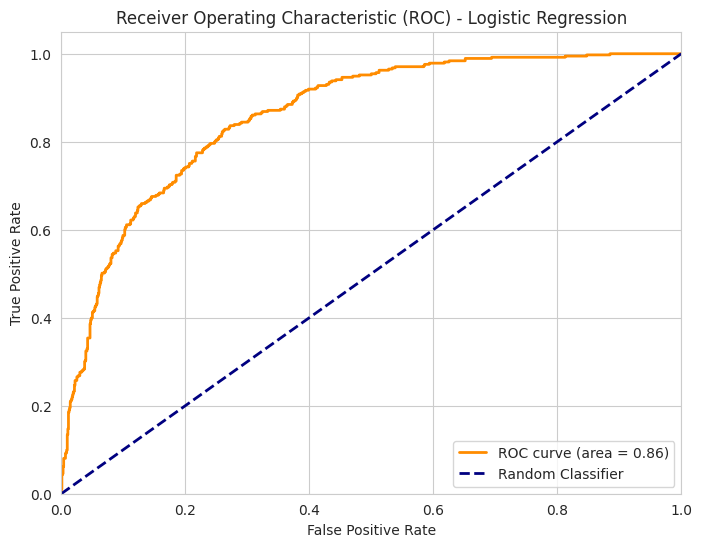

In [40]:
print("\n--- Logistic Regression Model Evaluation ---")
# Make predictions
y_pred_lr = lr_model.predict(X_test)
y_pred_proba_lr = lr_model.predict_proba(X_test)[:, 1]

# Calculate accuracy
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Accuracy: {accuracy_lr:.4f}")

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_lr))

# Compute ROC curve and AUC
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_proba_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_lr:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Logistic Regression')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


To evaluate the RandomForest Classifier model, I will predict on the test set, calculate and print the accuracy score and classification report, compute the ROC curve metrics, and then plot the ROC curve with the AUC score.




--- Random Forest Classifier Model Evaluation ---
Accuracy: 0.7913
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.91      0.87      1036
           1       0.65      0.46      0.54       373

    accuracy                           0.79      1409
   macro avg       0.74      0.68      0.70      1409
weighted avg       0.78      0.79      0.78      1409



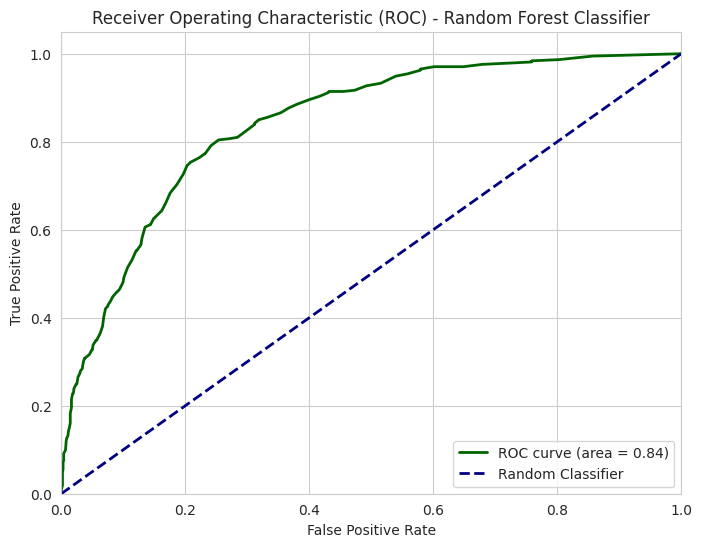

In [41]:
print("\n--- Random Forest Classifier Model Evaluation ---")
# Make predictions
y_pred_rf = rf_model.predict(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy_rf:.4f}")

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Compute ROC curve and AUC
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='darkgreen', lw=2, label=f'ROC curve (area = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Random Forest Classifier')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


To evaluate the Gradient Boosting Classifier model, I will predict on the test set, calculate and print the accuracy score and classification report, compute the ROC curve metrics, and then plot the ROC curve with the AUC score.




--- Gradient Boosting Classifier Model Evaluation ---
Accuracy: 0.8091
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1036
           1       0.67      0.54      0.60       373

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.74      1409
weighted avg       0.80      0.81      0.80      1409



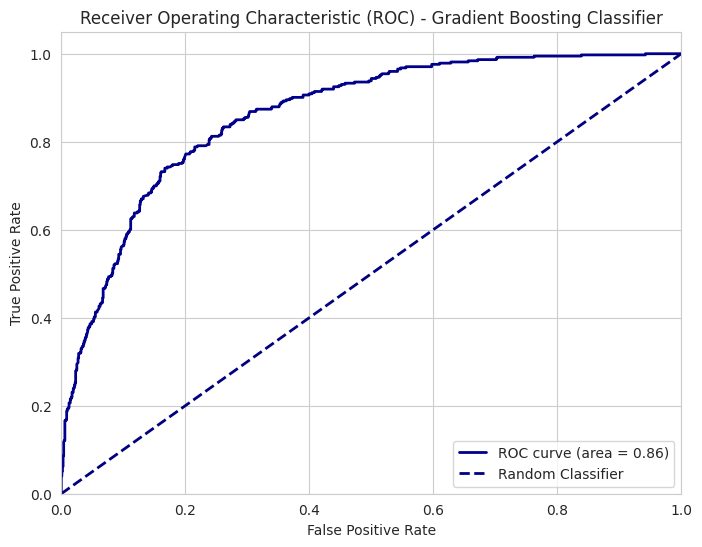

In [42]:
print("\n--- Gradient Boosting Classifier Model Evaluation ---")
# Make predictions
y_pred_gb = gb_model.predict(X_test)
y_pred_proba_gb = gb_model.predict_proba(X_test)[:, 1]

# Calculate accuracy
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f"Accuracy: {accuracy_gb:.4f}")

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_gb))

# Compute ROC curve and AUC
fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test, y_pred_proba_gb)
roc_auc_gb = auc(fpr_gb, tpr_gb)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_gb, tpr_gb, color='darkblue', lw=2, label=f'ROC curve (area = {roc_auc_gb:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Gradient Boosting Classifier')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()